# Raport NYPD
### Maciej Dzikowski, 406104

ścieżki do plików:

In [1]:
gminy2019 = './data/2019/20200214_Gminy_za_2019.xlsx'
powiaty2019 = './data/2019/20200214_Powiaty_za_2019.xlsx'
wojewodztwa2019 = './data/2019/20200214_Wojewodztwa_za_2019.xlsx'
miasta2019 = './data/2019/20200214_Miasta_NPP_za_2019.xlsx'
metropolie2019 = './data/2019/20200214_Gornoslasko_Zaglebiowska_Metropolia.xlsx'

gminy2020 = './data/2020/20210215_Gminy_2_za_2020.xlsx'
powiaty2020 = './data/2020/20210211_Powiaty_za_2020.xlsx'
wojewodztwa2020 = './data/2020/20210211_Województwa_za_2020.xlsx'
miasta2020 = './data/2020/20210215_Miasta_NPP_2_za_2020.xlsx'
metropolie2020 = './data/2020/20210211_Metropolia_2020.xlsx'

In [2]:
table_of_content = './data/LSiS/Lista tablic.xlsx'
tabII = './data/LSiS/Tabela_II.xls'
tabIII = './data/LSiS/Tabela_III.xls'
tabIV = './data/LSiS/Tabela_IV.xls'

In [3]:
import pandas as pd

from package import parsers as pp
from package import functions as pf

In [4]:
columns_names = ['Nazwa JST', 'województwo', 'powiat', 'Dochody wykonane\n(wpłaty minus zwroty)']
income_row_name = 'Dochody wykonane\n(wpłaty minus zwroty)'
types_dict = {'WK': str, 'PK': str, 'GK': str, 'GT': str, 'Identyfikator terytorialny\nCode': str}

## Porównanie 2019 z 2020

### Gminy

In [5]:
df_g19 = pp.get_needed_columns(pp.parse_table(gminy2019, types_dict, [3]), columns_names, ['WK', 'PK', 'GK', 'GT'])
df_g20 = pp.get_needed_columns(pp.parse_table(gminy2020, types_dict, [3]), columns_names, ['WK', 'PK', 'GK', 'GT'])

2019:

In [6]:
pf.print_income_stats(df_g19, income_row_name)

Mean: 9638111.426793862
Median: 4776181.0
Standard deviation: 13441968.784496913
Min: (445556.0, '2007062')
MAx: (215717918.0, '1418043')


2020:

In [7]:
pf.print_income_stats(df_g20, income_row_name)

Mean: 9531447.103691414
Median: 4771170.0
Standard deviation: 13232667.56563441
Min: (474958.0, '2007062')
MAx: (210836330.0, '1418043')


### Powiaty

In [8]:
df_p19 = pp.get_needed_columns(pp.parse_table(powiaty2019, types_dict, [3]), columns_names, ['WK', 'PK'])
df_p20 = pp.get_needed_columns(pp.parse_table(powiaty2020, types_dict, [3]), columns_names, ['WK', 'PK'])

2019:

In [9]:
pf.print_income_stats(df_p19, income_row_name)

Mean: 19920229.382165603
Median: 14904194.0
Standard deviation: 17686364.476138648
Min: (3194009.0, '2009')
MAx: (177620788.0, '3021')


2020:

In [10]:
pf.print_income_stats(df_p20, income_row_name)

Mean: 19658475.464968152
Median: 14746242.5
Standard deviation: 17628102.565671142
Min: (2958681.0, '2009')
MAx: (179647852.0, '3021')


Porównanie danych pomiędzy tabelami gmin a tabelami powiatów.

In [11]:
df_g19.groupby('powiat').sum()

,Dochody wykonane\n(wpłaty minus zwroty)
powiat,
aleksandrowski,39004532.0
augustowski,42411035.0
bartoszycki,36641729.0
bełchatowski,139470489.0
bialski,59981550.0
...,...
żarski,79445690.0
żniński,48690005.0
żuromiński,24808516.0


In [12]:
df_p19.groupby('Nazwa JST').sum()

,Dochody wykonane\n(wpłaty minus zwroty)
Nazwa JST,
aleksandrowski,10498853.0
augustowski,11415779.0
bartoszycki,9862859.0
bełchatowski,37541278.0
bialski,16145236.0
...,...
żarski,21384403.0
żniński,13105893.0
żuromiński,6677709.0


Jak widać dochody dla poszczególnych gmin nie sumują się do dochodu powiatów, na które się składają.

### Województwa

In [13]:
df_w19 = pp.get_needed_columns(pp.parse_table(wojewodztwa2019, types_dict, [3]), columns_names, ['WK'])
df_w20 = pp.get_needed_columns(pp.parse_table(wojewodztwa2020, types_dict, [3]), columns_names, ['WK'])

2019:

In [14]:
pf.print_income_stats(df_w19, income_row_name)

Mean: 112409664.3125
Median: 74691159.5
Standard deviation: 92339386.43788011
Min: (37165073.0, '16')
MAx: (389959220.0, '14')


2020:

In [15]:
pf.print_income_stats(df_w20, income_row_name)

Mean: 110133253.8125
Median: 72807810.5
Standard deviation: 90223840.03429149
Min: (36183042.0, '16')
MAx: (380227237.0, '14')


Podsumowując statystyki dla wszystkich jednostek administracyjnych, można stwierdzić, że dochód PIT w 2020 roku był niższy w całym kraju niż w 2019 roku. Jednak maksymalne i minimalne wartości dla każdego roku pozostały w tych samych okręgach.

Porównanie danych pomiędzy tabelami powiatów a tabelami województw.

In [16]:
df_p19.groupby('województwo').sum()

,Dochody wykonane\n(wpłaty minus zwroty)
województwo,
dolnośląskie,5.451692e+08
kujawsko-pomorskie,2.813981e+08
lubelskie,2.711965e+08
lubuskie,1.696623e+08
mazowieckie,1.013253e+09
małopolskie,5.650330e+08
opolskie,1.879603e+08
podkarpackie,3.252572e+08
podlaskie,1.376123e+08


In [17]:
df_w19.groupby('Nazwa JST').sum()

,Dochody wykonane\n(wpłaty minus zwroty)
Nazwa JST,
dolnośląskie,146521177.0
kujawsko-pomorskie,80114406.0
lubelskie,67219899.0
lubuskie,40309236.0
mazowieckie,389959220.0
małopolskie,156151173.0
opolskie,37165073.0
podkarpackie,67137520.0
podlaskie,41529479.0


Podobnie jak w przypadku gmin i powiatów. Tutaj powodem może być nie doliczenie miast i metropolii.

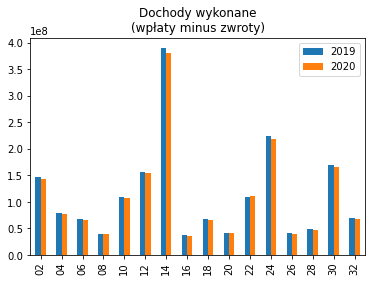

In [18]:
pf.make_plots(df_w19, df_w20, income_row_name, '2019', '2020')

---

## Dodanie danych o ludności|

procent pracujących: 60%

In [19]:
working = 0.6

Przygotowanie odpowiednich dataframów.

In [20]:
df_II = pp.get_needed_columns(
    pp.parse_table(tabII, types_dict, [3]),
    ['Województwa\nVoivodships', 'Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31)']
).iloc[1:17].reset_index(drop=True)
df_II['Województwa\nVoivodships'] = df_II['Województwa\nVoivodships'].apply(lambda x: x.lower())
df_II.rename(columns={'Województwa\nVoivodships': 'Nazwa JST'}, inplace=True)
df_II

,Nazwa JST,Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31)
0,dolnośląskie,2891321.0
1,kujawsko-pomorskie,2061942.0
2,lubelskie,2095258.0
3,lubuskie,1007145.0
4,łódzkie,2437970.0
5,małopolskie,3410441.0
6,mazowieckie,5425028.0
7,opolskie,976774.0
8,podkarpackie,2121229.0
9,podlaskie,1173286.0


In [22]:
df_III = pp.get_needed_columns(
    pp.parse_table(tabIII, types_dict, [3]),
    ['Województwa \nVoivodships\nPowiaty\nPowiats', 'Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31)'],
    ['Identyfikator terytorialny\nCode']
)
df_III = df_III.drop(df_III[df_III.index == 'nan'].index)
df_III

,Województwa \nVoivodships\nPowiaty\nPowiats,Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31)
0201,bolesławiecki,89762.0
0202,dzierżoniowski,99935.0
0203,głogowski,88447.0
0204,górowski,34552.0
0205,jaworski,49734.0
...,...,...
3216,świdwiński,46394.0
3217,wałecki,52707.0
3261,M.Koszalin,106235.0
3262,M.Szczecin,398255.0


In [23]:
df_IV = pp.get_needed_columns(
    pp.parse_table(tabIV, types_dict, [3], ),
    ['Województwa\nVoivodships\nGminy\nGminas', 'Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31)'],
    ['Identyfikator terytorialny\nCode']
)
df_IV = df_IV.drop(df_IV[df_IV.index == 'nan'].index)
df_IV

,Województwa\nVoivodships\nGminy\nGminas,Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31)
0201011,M.Bolesławiec,38486.0
0201022,G.Bolesławiec,14863.0
0201032,G.Gromadka,5317.0
0201043,M-W.Nowogrodziec,15229.0
0201044,M.Nowogrodziec,4263.0
...,...,...
3218054,M.Węgorzyno,2771.0
3218055,G.Węgorzyno,4085.0
3261011,M.Koszalin,106235.0
3262011,M.Szczecin,398255.0


W tabelach ludności jest więcej powiatów i gmin. Zostaną one usunięte.

### Średni dochód

województwa:

In [24]:
woj20 = pd.merge(df_w20, df_II, on='Nazwa JST')
woj20.head()

,Nazwa JST,województwo,powiat,Dochody wykonane\n(wpłaty minus zwroty),Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31)
0,dolnośląskie,-,-,143787146.0,2891321.0
1,kujawsko-pomorskie,-,-,77938448.0,2061942.0
2,lubelskie,-,-,65228210.0,2095258.0
3,lubuskie,-,-,38895731.0,1007145.0
4,łódzkie,-,-,106927491.0,2437970.0


In [25]:
pf.get_average_income_per_worker(woj20, 'Dochody wykonane\n(wpłaty minus zwroty)', 'Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31)', working)

,Nazwa JST,województwo,powiat,Dochody wykonane\n(wpłaty minus zwroty),Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31),Average income
0,dolnośląskie,-,-,143787146.0,2891321.0,82.884344
1,kujawsko-pomorskie,-,-,77938448.0,2061942.0,62.997608
2,lubelskie,-,-,65228210.0,2095258.0,51.885583
3,lubuskie,-,-,38895731.0,1007145.0,64.366321
4,łódzkie,-,-,106927491.0,2437970.0,73.098719
5,małopolskie,-,-,154769447.0,3410441.0,75.635109
6,mazowieckie,-,-,380227237.0,5425028.0,116.812680
7,opolskie,-,-,36183042.0,976774.0,61.739020
8,podkarpackie,-,-,65682244.0,2121229.0,51.607067
9,podlaskie,-,-,40759371.0,1173286.0,57.899170


powiaty:

In [26]:
pow20 = pd.merge(df_p20, df_III, left_index=True, right_index=True)
pow20.head()

,Nazwa JST,województwo,powiat,Dochody wykonane\n(wpłaty minus zwroty),Województwa \nVoivodships\nPowiaty\nPowiats,Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31)
0201,bolesławiecki,dolnośląskie,-,21276533.0,bolesławiecki,89762.0
0202,dzierżoniowski,dolnośląskie,-,21328692.0,dzierżoniowski,99935.0
0203,głogowski,dolnośląskie,-,28916309.0,głogowski,88447.0
0204,górowski,dolnośląskie,-,5682116.0,górowski,34552.0
0205,jaworski,dolnośląskie,-,10450783.0,jaworski,49734.0


In [27]:
pf.get_average_income_per_worker(pow20, 'Dochody wykonane\n(wpłaty minus zwroty)', 'Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31)', working)

,Nazwa JST,województwo,powiat,Dochody wykonane\n(wpłaty minus zwroty),Województwa \nVoivodships\nPowiaty\nPowiats,Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31),Average income
0201,bolesławiecki,dolnośląskie,-,21276533.0,bolesławiecki,89762.0,395.054570
0202,dzierżoniowski,dolnośląskie,-,21328692.0,dzierżoniowski,99935.0,355.709411
0203,głogowski,dolnośląskie,-,28916309.0,głogowski,88447.0,544.889576
0204,górowski,dolnośląskie,-,5682116.0,górowski,34552.0,274.085243
0205,jaworski,dolnośląskie,-,10450783.0,jaworski,49734.0,350.222618
...,...,...,...,...,...,...,...
3214,stargardzki,zachodniopomorskie,-,27801859.0,stargardzki,120132.0,385.712647
3215,szczecinecki,zachodniopomorskie,-,15277345.0,szczecinecki,77258.0,329.574176
3216,świdwiński,zachodniopomorskie,-,8641304.0,świdwiński,46394.0,310.431809
3217,wałecki,zachodniopomorskie,-,10931442.0,wałecki,52707.0,345.666989


gminy:

In [28]:
gm20 = pd.merge(df_g20, df_IV, left_index=True, right_index=True)
gm20.head()

,Nazwa JST,województwo,powiat,Dochody wykonane\n(wpłaty minus zwroty),Województwa\nVoivodships\nGminy\nGminas,Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31)
0201011,BOLESŁAWIEC,dolnośląskie,bolesławiecki,40456699.0,M.Bolesławiec,38486.0
0201022,BOLESŁAWIEC,dolnośląskie,bolesławiecki,13789712.0,G.Bolesławiec,14863.0
0201032,GROMADKA,dolnośląskie,bolesławiecki,3573540.0,G.Gromadka,5317.0
0201043,NOWOGRODZIEC,dolnośląskie,bolesławiecki,9553744.0,M-W.Nowogrodziec,15229.0
0201052,OSIECZNICA,dolnośląskie,bolesławiecki,5844560.0,G.Osiecznica,7288.0


In [29]:
pf.get_average_income_per_worker(gm20, 'Dochody wykonane\n(wpłaty minus zwroty)', 'Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31)', working)

,Nazwa JST,województwo,powiat,Dochody wykonane\n(wpłaty minus zwroty),Województwa\nVoivodships\nGminy\nGminas,Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31),Average income
0201011,BOLESŁAWIEC,dolnośląskie,bolesławiecki,40456699.0,M.Bolesławiec,38486.0,1752.009345
0201022,BOLESŁAWIEC,dolnośląskie,bolesławiecki,13789712.0,G.Bolesławiec,14863.0,1546.313216
0201032,GROMADKA,dolnośląskie,bolesławiecki,3573540.0,G.Gromadka,5317.0,1120.161745
0201043,NOWOGRODZIEC,dolnośląskie,bolesławiecki,9553744.0,M-W.Nowogrodziec,15229.0,1045.564822
0201052,OSIECZNICA,dolnośląskie,bolesławiecki,5844560.0,G.Osiecznica,7288.0,1336.571533
...,...,...,...,...,...,...,...
3218013,DOBRA,zachodniopomorskie,łobeski,2010454.0,M-W.Dobra,4353.0,769.758021
3218023,ŁOBEZ,zachodniopomorskie,łobeski,8834999.0,M-W.Łobez,13815.0,1065.870310
3218032,RADOWO MAŁE,zachodniopomorskie,łobeski,1546533.0,G.Radowo Małe,3577.0,720.591278
3218043,RESKO,zachodniopomorskie,łobeski,6612100.0,M-W.Resko,7885.0,1397.611499


### Wariancja

In [30]:
pf.get_variance(woj20, pow20, 'województwo', 'Dochody wykonane\n(wpłaty minus zwroty)')

,Nazwa JST,województwo,powiat,Dochody wykonane\n(wpłaty minus zwroty),Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31),Average income,Variance
0,dolnośląskie,-,-,143787146.0,2891321.0,82.884344,2.087919e+14
1,kujawsko-pomorskie,-,-,77938448.0,2061942.0,62.997608,1.027592e+14
2,lubelskie,-,-,65228210.0,2095258.0,51.885583,5.040018e+13
3,lubuskie,-,-,38895731.0,1007145.0,64.366321,2.079063e+13
4,łódzkie,-,-,106927491.0,2437970.0,73.098719,7.644574e+14
5,małopolskie,-,-,154769447.0,3410441.0,75.635109,4.269454e+14
6,mazowieckie,-,-,380227237.0,5425028.0,116.812680,5.027194e+13
7,opolskie,-,-,36183042.0,976774.0,61.739020,7.481516e+13
8,podkarpackie,-,-,65682244.0,2121229.0,51.607067,6.483979e+13
9,podlaskie,-,-,40759371.0,1173286.0,57.899170,2.006869e+14


In [31]:
gm20['pow_id'] = gm20.index
gm20['pow_id'] = gm20['pow_id'].apply(lambda x: x[:-3])
pf.get_variance(pow20, gm20, 'pow_id', 'Dochody wykonane\n(wpłaty minus zwroty)')

,Nazwa JST,województwo,powiat,Dochody wykonane\n(wpłaty minus zwroty),Województwa \nVoivodships\nPowiaty\nPowiats,Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31),Average income,Variance
0201,bolesławiecki,dolnośląskie,-,21276533.0,bolesławiecki,89762.0,395.054570,1.910575e+14
0202,dzierżoniowski,dolnośląskie,-,21328692.0,dzierżoniowski,99935.0,355.709411,1.171622e+14
0203,głogowski,dolnośląskie,-,28916309.0,głogowski,88447.0,544.889576,1.009052e+15
0204,górowski,dolnośląskie,-,5682116.0,górowski,34552.0,274.085243,2.772437e+13
0205,jaworski,dolnośląskie,-,10450783.0,jaworski,49734.0,350.222618,4.923600e+13
...,...,...,...,...,...,...,...,...
3214,stargardzki,zachodniopomorskie,-,27801859.0,stargardzki,120132.0,385.712647,3.985667e+14
3215,szczecinecki,zachodniopomorskie,-,15277345.0,szczecinecki,77258.0,329.574176,1.730717e+14
3216,świdwiński,zachodniopomorskie,-,8641304.0,świdwiński,46394.0,310.431809,2.770189e+13
3217,wałecki,zachodniopomorskie,-,10931442.0,wałecki,52707.0,345.666989,7.050053e+13


### Średnia ważona

In [32]:
pf.get_weighted_average(woj20, pow20, 'województwo', 'Dochody wykonane\n(wpłaty minus zwroty)', 'Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31)', working)

,Nazwa JST,województwo,powiat,Dochody wykonane\n(wpłaty minus zwroty),Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31),Average income,Variance,Weighted average
0,dolnośląskie,-,-,143787146.0,2891321.0,82.884344,2.087919e+14,1.019974e+06
1,kujawsko-pomorskie,-,-,77938448.0,2061942.0,62.997608,1.027592e+14,9.955005e+05
2,lubelskie,-,-,65228210.0,2095258.0,51.885583,5.040018e+13,7.806642e+05
3,lubuskie,-,-,38895731.0,1007145.0,64.366321,2.079063e+13,1.238168e+06
4,łódzkie,-,-,106927491.0,2437970.0,73.098719,7.644574e+14,1.098386e+06
5,małopolskie,-,-,154769447.0,3410441.0,75.635109,4.269454e+14,1.981552e+06
6,mazowieckie,-,-,380227237.0,5425028.0,116.812680,5.027194e+13,1.735815e+06
7,opolskie,-,-,36183042.0,976774.0,61.739020,7.481516e+13,8.917328e+05
8,podkarpackie,-,-,65682244.0,2121229.0,51.607067,6.483979e+13,9.893891e+05
9,podlaskie,-,-,40759371.0,1173286.0,57.899170,2.006869e+14,1.806698e+06


In [33]:
pf.get_weighted_average(pow20, gm20, 'pow_id', 'Dochody wykonane\n(wpłaty minus zwroty)', 'Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31)', working)

,Nazwa JST,województwo,powiat,Dochody wykonane\n(wpłaty minus zwroty),Województwa \nVoivodships\nPowiaty\nPowiats,Ludność\n(stan w dniu 31.12)\nPopulation\n(as of \nDecember 31),Average income,Variance,Weighted average
0201,bolesławiecki,dolnośląskie,-,21276533.0,bolesławiecki,53857.2,395.054570,1.910575e+14,3.751539e+06
0202,dzierżoniowski,dolnośląskie,-,21328692.0,dzierżoniowski,59961.0,355.709411,1.171622e+14,2.695247e+06
0203,głogowski,dolnośląskie,-,28916309.0,głogowski,53068.2,544.889576,1.009052e+15,1.053069e+07
0204,górowski,dolnośląskie,-,5682116.0,górowski,20731.2,274.085243,2.772437e+13,2.186947e+06
0205,jaworski,dolnośląskie,-,10450783.0,jaworski,29840.4,350.222618,4.923600e+13,1.931275e+06
...,...,...,...,...,...,...,...,...,...
3214,stargardzki,zachodniopomorskie,-,27801859.0,stargardzki,72079.2,385.712647,3.985667e+14,3.983331e+06
3215,szczecinecki,zachodniopomorskie,-,15277345.0,szczecinecki,46354.8,329.574176,1.730717e+14,3.472995e+06
3216,świdwiński,zachodniopomorskie,-,8641304.0,świdwiński,27836.4,310.431809,2.770189e+13,1.438035e+06
3217,wałecki,zachodniopomorskie,-,10931442.0,wałecki,31624.2,345.666989,7.050053e+13,2.721671e+06


---

## Profilowanie

Skrypt w żadnym momencie nie napotyka "wąskiego gardła".   
Najgorzej pod względem czasu zachowuje się funkcja `pase_table`, ale jest to najprawdopodobniej spowodowane podobnym działaniem funkcji biblioteki pandas - `read_excel`.